# Adding Wind and Penny Orientation

In this iteration, you'll be asked to consider how we might add the effects of the wind and penny orientation to the penny falling problem.

<br>

We'll start with the code as it currently exists.  Here are the functions:

In [1]:
import numpy as np
import pandas as pd

def make_system(v_term, rho, g, mass, diameter, t_end, dt):
    area = np.pi * (diameter/2)**2
    C_d = (2.0*mass*g)/(rho*v_term**2*area)
    system = dict(area=area,C_d=C_d, rho=rho, g=g,
                  v_term=v_term, mass=mass, t_end=t_end, dt = dt)
    return system

def run_simulation(system, state, change_func):
    # Define the time steps
    t_array = np.arange(0, system['t_end']+1, system['dt'])
    n = len(t_array)

    # Set up a DataFrame to store the our state variables
    results = pd.DataFrame(index=t_array, columns=state.index,
                        dtype=np.float64)
    results.iloc[0] = state

    for i in range(n-1):
        # Test to see if the penny has hit the ground
        if state.y <= 0.0:
            return results
        t = t_array[i]
        state = change_func(t, state, system)
        results.iloc[i+1] = state
    return results

def change_func(t, state, system):
    y, v = state
    rho, C_d, area = system['rho'], system['C_d'], system['area']
    mass, g, dt = system['mass'], system['g'], system['dt']

    # Determine the drag force on the penny
    f_drag = rho * v**2 * C_d * area / 2
    if v < 0:
        a_drag = f_drag / mass
    else:
        a_drag = -f_drag / mass

    # Update the state variables
    dydt = v
    dvdt = -g + a_drag
    y = y + dydt*dt
    v = v + dvdt*dt

    return pd.Series(dict(y=y, v=v))

And here's the runtime code:

In [6]:
v_term = 29.0       # terminal velocity, 29 m/s
rho = 1.2           # density of air, kg/m^3
g = 9.81            # gravity, m/s^2
mass = 0.0025       # mass, kg
diameter = 0.019    # diameter, m
t_end = 20.0        # length of simulation, s
dt = 0.1            # time step length, s
height = 381        # m
v_init = 0          # initial velocity, m/s

state = pd.Series(dict(y=height, v=v_init))
system = make_system(v_term, rho, g, mass, diameter, t_end, dt)
results = run_simulation(system, state, change_func)

0.1714212614288154

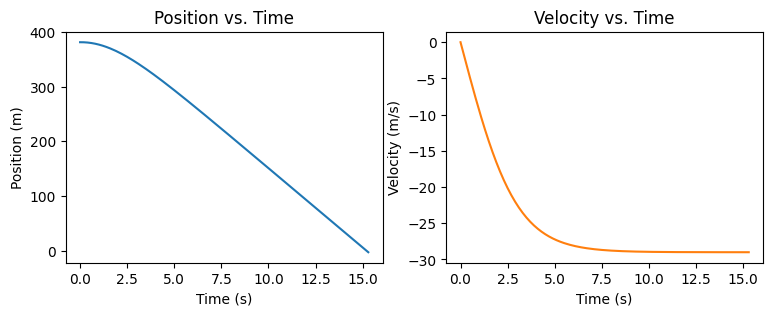

In [5]:
import matplotlib.pyplot as plt
axes = results.plot(title = ['Position vs. Time', 'Velocity vs. Time'], subplots=True,
             figsize = (9,3), xlabel = 'Time (s)', layout=(1,2), legend = False);
axes[0][0].set_ylabel('Position (m)')
axes[0][1].set_ylabel('Velocity (m/s)');

## Altering the orientation of the penny

Now let's see if we can improve our model.  When the penny falls, it's orientation will change, which will significantly change the coefficient of drag as well as the area of the penny (in the drag equation).

<br>

To make this a little more manageable, we'll collapse those changes into just the coefficient of drag `C_d`.   Presumably, the changes in orientation will be random, and the value could go up or down at any time step.  Also, the `C_d` will have maximum and minimum values: let's set those as 0.68 and 0.04 (roughly 4 times and 1/4 of the value we have been using).

<br>

Now we need a function that changes `C_d` at each time step by a little bit without every leaving our set bounds.  We'll call this in change function, but we want to makes sure the change we make is saved in `system` so the next step will build on that change.  You will probably want to use `npr.random()` to simulate the random changes.  What can you come up with?

In [7]:
import numpy.random as npr

# Define a function that randomly adjusts the orientation of the penny,
# causing the coefficient of drag to change.
def orientation(C_d):


    return C_d

In [ ]:
# Test your code: Make sure it C_d changes as you would expect, and
# that it doesn't leave the bounds we defined (0.68, 0.04)
c_d_test = 0.17
c_d_test = orientation(c_d_test)
print(c_d_test)

The last step is to decide where to call the function.  You'll probably want to call it somewhere in `change_func`.  And don't forget to change the value of `system['C_d']` to the new value!

<br>

And test it out.  Can you notice any difference between this plot and the original plots?

In [ ]:
results_orien = run_simulation(system, state, change_func)
axes = results_orien.plot(title = ['Position vs. Time', 'Velocity vs. Time'], subplots=True,
             figsize = (9,3), xlabel = 'Time (s)', layout=(1,2), legend = False);
axes[0][0].set_ylabel('Position (m)')
axes[0][1].set_ylabel('Velocity (m/s)');

## Adding the effects of wind

Here's another fun little iteration!  We know that wind would make a difference on the drag, and now we can test how much.   The wind will affect the drag force: with wind, the drag force will be calculated not using the absolute velocity of the penny, but it's relative velocity.  So if the penny is moving at an absolute velocity (relative to the ground) of $-20~m/s$, but there is an updraft of $5~m/s$, then the penny will *feel like* it is moving at $-25~ m/s$ (if pennies had feelings).  In other words, the updraft will create a larger drag force in the upward direction.

<br>

So you'll need to decide on the wind speed, then find the relative velocity of the penny before you calculate the drag force.  You might start with a constant wind, but you could also code in random changes to the wind, or vary the wind sinusoidally around some average wind speed.

<br>

See what you can come up with!

In [ ]:
# Create a function that calculates the speed of the wind
# Do this even if the wind is constant: this will allow you
# to add variations in later
def wind():
    return wind_speed

In [ ]:
# Call your function to make sure it returns values that you expect

Once your function works, look at `change_func()` to decide where you need to call `wind()` and how to add it to your calculations.